In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [6]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      //Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      //Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);

    }
    ''')

  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [3]:
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions
import numpy as np

model = NASNetLarge(weights='imagenet')


359748576/359748576 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


<IPython.core.display.Javascript object>

Savded to photo.jpg


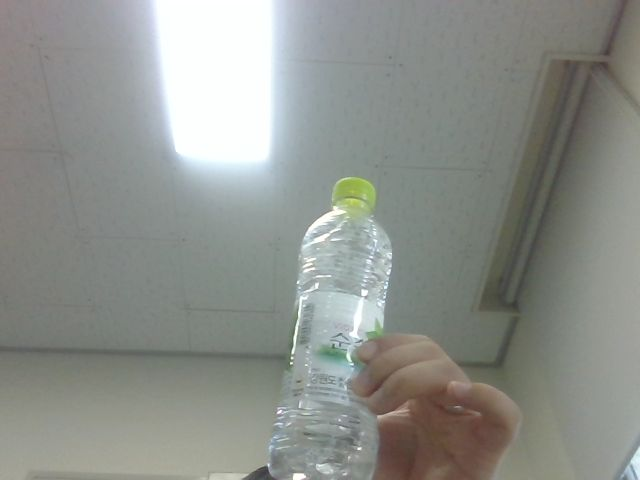

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: [('n04557648', 'water_bottle', np.float32(0.92492133)), ('n03983396', 'pop_bottle', np.float32(0.0054904055)), ('n03825788', 'nipple', np.float32(0.0008485333))]


In [9]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Savded to {}'.format(filename))

  #show the image which was just taken.
  display(Image(filename))

  img = image.load_img(filename, target_size=(331, 331))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  #decode the results into a list of tuples (class, description, probability)
  #(one such list for each sample in the batch)
  print('Predicted:', decode_predictions(preds, top=3)[0])
except Exception as err:
  #Errors will be thrown if the user does not have a webcam or if they do not
  #grant the page permission to access it.
  print(str(err))